In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
print('Data loaded')

Data loaded


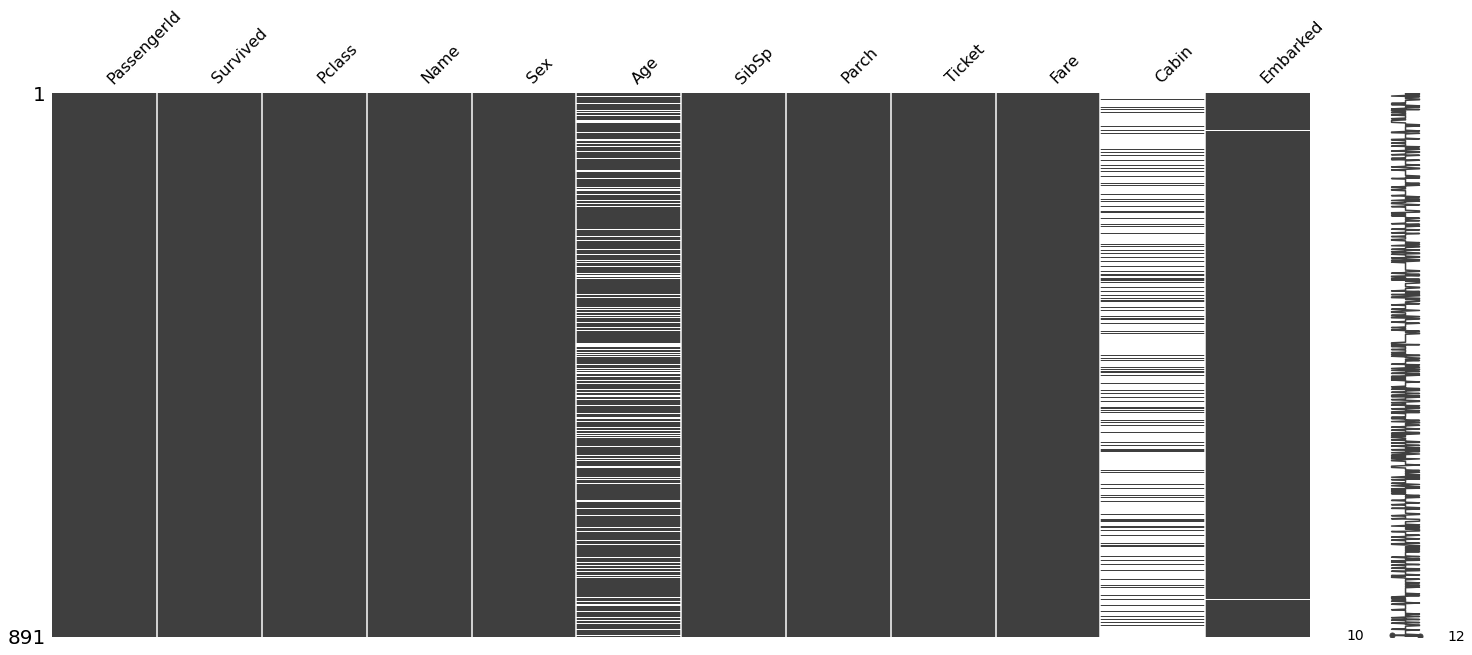

In [3]:
import missingno
missingno.matrix(train)

In [4]:
print(train.isnull().sum(),'\n\n\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#   **Pclass :**

In [6]:
train.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0, 0.5, 'Number Survived')

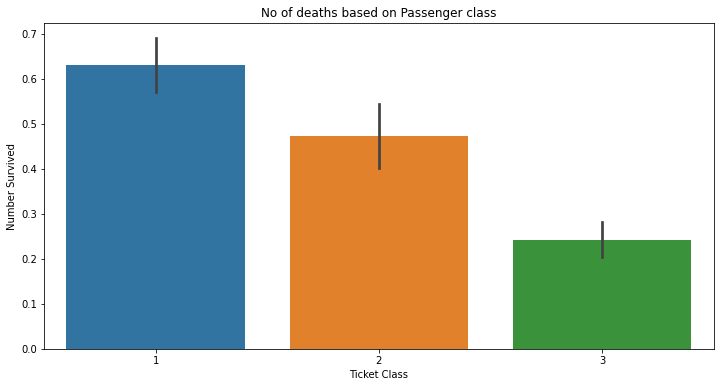

In [7]:
plt.figure(figsize=(12,6))
plt.title('No of deaths based on Passenger class')
sns.barplot(x=train['Pclass'], y=train['Survived'])
plt.xlabel('Ticket Class')
plt.ylabel('Number Survived')

# **Sex :**

In [8]:
train.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
dummy_sex = pd.get_dummies(train['Sex'], prefix = 'Sex')
train = pd.concat([train,dummy_sex], axis=1)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [11]:
dummy1 = pd.get_dummies(test['Sex'], prefix = 'Sex')
test = pd.concat([test,dummy1], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


# **Age :**

In [12]:
test['Age'].isna().value_counts()

False    332
True      86
Name: Age, dtype: int64

Text(0, 0.5, 'Passenger Age')

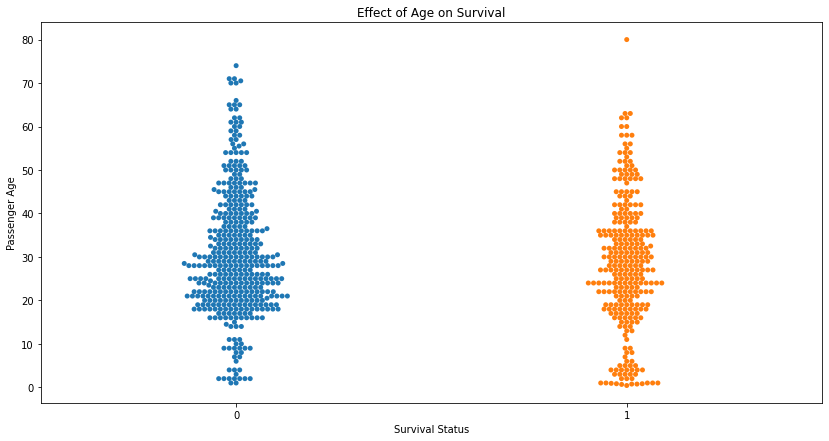

In [13]:
plt.figure(figsize=(14,7))
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.title('Effect of Age on Survival')
plt.xlabel('Survival Status')
plt.ylabel('Passenger Age')

In [14]:
train['Age'].replace(np.nan, train['Age'].median(), inplace=True)
test['Age'].replace(np.nan, test['Age'].median(), inplace=True )

In [15]:
print('Minimum age:', min(train['Age']))
print('Maximum age:', max(train['Age']))

Minimum age: 0.42
Maximum age: 80.0


In [16]:
def count_age_groups(val):
    count = 0
    for i in train.Age:
        if i<val:
            count+=1
    return count
    

In [17]:
count_10 = count_age_groups(10)
print(count_10)
count_25 = count_age_groups(25)
print(count_25 - count_10)
count_40 = count_age_groups(40)
print(count_40 - count_25)
count_60 = count_age_groups(60)
print(count_60 - count_40)

62
216
450
137


In [18]:
bins_age = np.linspace(min(train.Age), max(train.Age), 6)
print(bins_age)

[ 0.42  16.336 32.252 48.168 64.084 80.   ]


In [19]:
groups_age = [1,2,3,4,5]
train['Age_binned'] = pd.cut(train['Age'], bins_age, labels=groups_age, include_lowest=True)
test['Age_binned'] = pd.cut(test['Age'], bins_age, labels=groups_age, include_lowest=True)

In [20]:
test['Age_binned'].replace(np.nan, test['Age_binned'].value_counts().idxmax(), inplace=True)
train['Age_binned'].replace(np.nan, train['Age_binned'].value_counts().idxmax(), inplace=True)
print(train['Age_binned'].isna().value_counts(), '\n\n\n')
print(test['Age_binned'].isna().value_counts())

False    891
Name: Age_binned, dtype: int64 



False    418
Name: Age_binned, dtype: int64


Text(0.5, 0, 'Age groups')

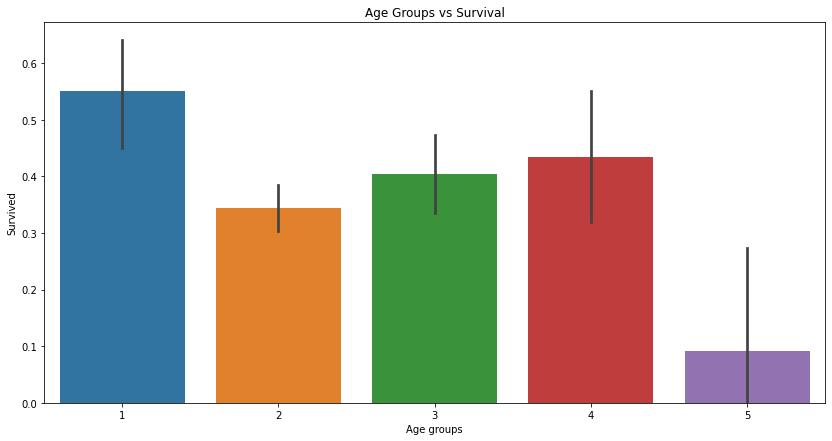

In [21]:
plt.figure(figsize=(14,7))
plt.title('Age Groups vs Survival')
sns.barplot(x=train['Age_binned'], y=train['Survived'])
plt.xlabel('Age groups')

# **Fare :**

In [22]:
test['Fare'].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [23]:
test['Fare'].replace(np.nan, test['Fare'].value_counts().idxmax(), inplace=True)
test['Fare'].isnull().value_counts()

False    418
Name: Fare, dtype: int64

Text(0, 0.5, 'Ticket Fare')

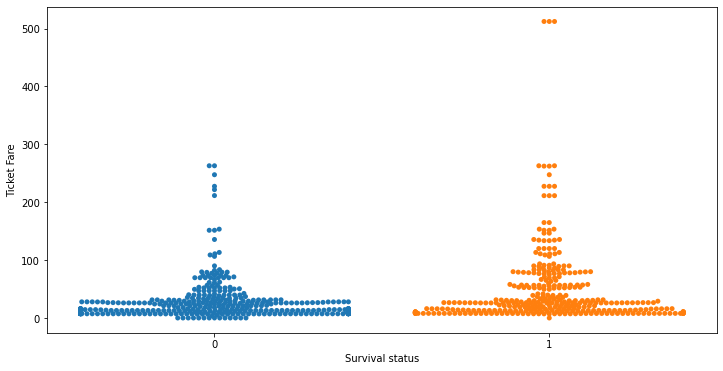

In [24]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=train['Survived'], y=train['Fare'])
plt.xlabel('Survival status')
plt.ylabel('Ticket Fare')

In [25]:
count = 0
for i in train['Fare']:
    if i>100:
        count+=1
print(count)

53


In [26]:
bins_fare = [0,10,30,50,100,1000]
groups_fare = [1,2,3,4,5]
train['Fare_binned'] = pd.cut(train['Fare'], bins_fare, labels=groups_fare, include_lowest = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,3,1


In [27]:
test['Fare_binned'] = pd.cut(test['Fare'], bins_fare, labels=groups_fare, include_lowest=True)
print(train['Fare_binned'].isnull().value_counts())
print(test['Fare_binned'].isnull().value_counts())

False    891
Name: Fare_binned, dtype: int64
False    418
Name: Fare_binned, dtype: int64


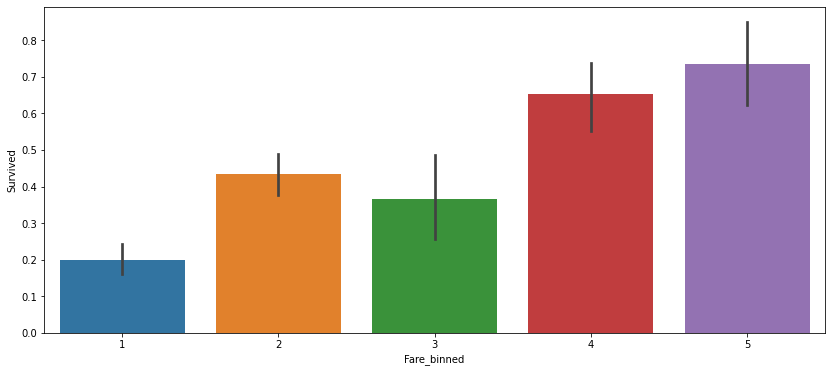

In [28]:
plt.figure(figsize=(14,6))
sns.barplot(x=train['Fare_binned'], y=train['Survived'])

# **Sib-Sp :**

In [29]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5, 0, 'No. of Siblings and Spouses on board')

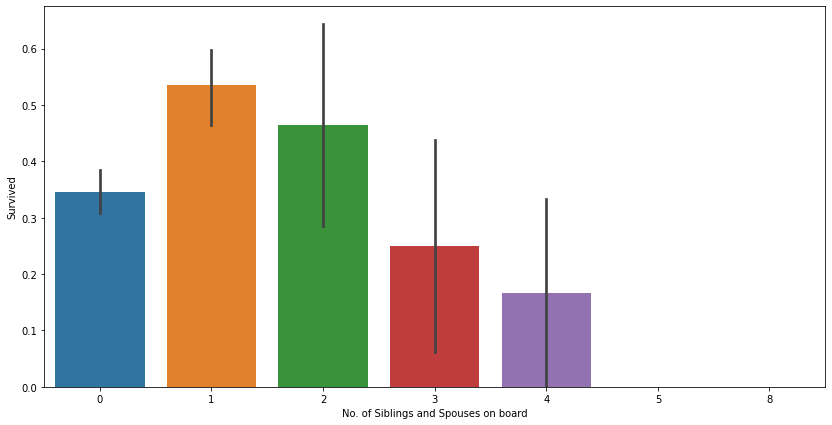

In [30]:
plt.figure(figsize=(14,7))
sns.barplot(x=train['SibSp'], y=train['Survived'])
plt.xlabel('No. of Siblings and Spouses on board')


# **Parch : **

In [31]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 0, 'No. of Parents and Children on board')

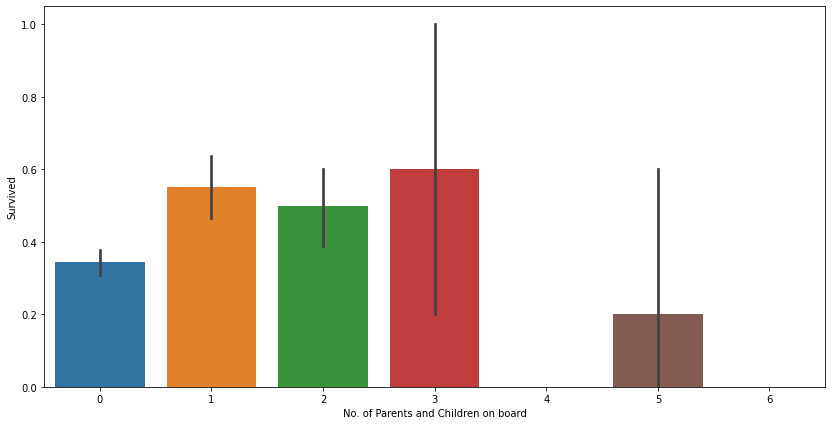

In [32]:
plt.figure(figsize=(14,7))
sns.barplot(x=train['Parch'], y=train['Survived'])
plt.xlabel('No. of Parents and Children on board')

# **Embarked :**

Text(0.5, 0, 'Port of Embarkation')

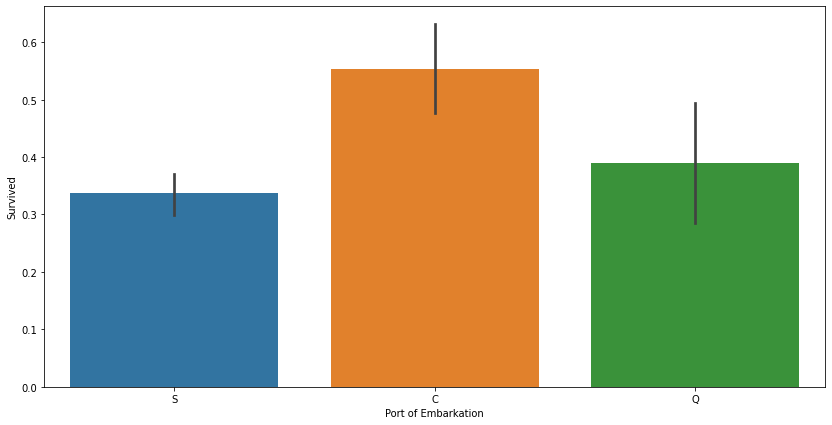

In [33]:
plt.figure(figsize=(14,7))
sns.barplot(x=train['Embarked'], y=train['Survived'])
plt.xlabel('Port of Embarkation')

In [34]:
train['Embarked'].replace(np.nan, train['Embarked'].value_counts().idxmax(), inplace=True)
train['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [35]:
dummy_embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
train = pd.concat([train, dummy_embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Age_binned,Fare_binned,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,2,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3,4,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,2,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3,4,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,3,1,0,0,1


In [36]:
dummy_embarked1 = pd.get_dummies(test['Embarked'], prefix='Embarked')
test = pd.concat([test, dummy_embarked1], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Age_binned,Fare_binned,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,3,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,3,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,4,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,2,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,2,2,0,0,1


# **Model Development :**

In [37]:
features = ['Pclass', 'Parch', 'Sex_male', 'Sex_female', 'Age_binned', 'Fare_binned', 'SibSp',  'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
def check_model_accuracy(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    return scores.mean()

In [40]:
random_forests = RandomForestClassifier(n_estimators = 500, max_depth = 10, random_state=1)
r_f_score = check_model_accuracy(random_forests, train[features], train.Survived)
print(r_f_score)
    

0.7332954304820094


In [41]:
gradientboost = GradientBoostingClassifier(learning_rate = 0.15, n_estimators = 500, max_depth = 3, random_state=3)
g_b_score = check_model_accuracy(gradientboost, train[features], train.Survived)
print(g_b_score)

0.7417801054522544


In [42]:
knn = KNeighborsClassifier(n_neighbors = 5)
print(check_model_accuracy(knn, train[features], train.Survived))

0.7345607987733294


In [43]:
gradientboost.fit(train[features], train['Survived'])
predictions = gradientboost.predict(test[features])

In [44]:
output1 = pd.DataFrame({'PassengerId' : test.PassengerId, 'Survived' : predictions})
output1.to_csv('submission1.csv', index = False)